# An introduction to Python for modeling (lab 1)

Authors: Ben Bolker, Steve Walker, Steve Ellner, *et al.*

![Creative Commons attribution/non-commercial license](cc-attrib-nc.png)
    
### How to use this document

These notes contain many sample calculations. It is important to 
do these yourself. You should start by typing `Kernel/Restart & Clear Output`
so that you can execute the code chunks in this notebook one by one
as you go through the lab. **Exercises** in the middle of a section should be done
immediately when you get to them; make sure you have them right 
before moving on. Some more challenging exercises 
(indicated by asterisks) appear at the end of some sections. These
can be left until later, and may be assigned as homework. 

These notes are based in part on course materials by former TAs
Colleen Webb, Jonathan Rowell and Daniel Fink at Cornell, Professors
Lou Gross (University of Tennessee) and Paul Fackler (NC State
University), and on the book *Getting Started with Matlab* by
Rudra Pratap (Oxford University Press), but have gone through many revisions and
changes.

# Interactive calculations

You can use Jupyter notebooks to do quick interactive calculations; if you know Python or R already, this is mimicking the way the Python or R consoles work. Try out some interactive calculations by opening a new **code cell**.

1. Click on this text to select the current cell (you should see a box around the cell and a blue line at the left-hand edge of the cell.)
2. Use `Insert/Insert Cell Below` from the menu, or type `b` (must be lower case), to insert a new code chunk below this text paragraph.
3. Type some Python computations into the entry box in the new chunk (for example `1+2`)
4. Type `SHIFT-ENTER` (the keys, both at once, not the words!) to evaluate the expression.
5. Edit your computations to do something different (for example `3*4`)
6. Type `SHIFT-ENTER` again to re-evaluate the code chunk.

**as you go through this tutorial you will need to use SHIFT-ENTER for every code chunk to make sure it's evaluated before moving on**

**ex1**: *Try editing the code chunk to include more than one computation (on separate lines). What happens when you re-evaluate?*

When you're done, clean up your mess.

1. Select the code chunk you just created by clicking somewhere to the left of the box  in which you're entering/editing code (in the white part of the notebook, not the gray background area). The bar at the left edge of the frame should turn blue [it's green while you're editing code].
2. Select `Edit/Delete Cells` from the menu, *or* type `dd` to use the keyboard shortcut.

# Assigning to variables; arithmetic and mathematical operators

You can store the results of your computations in a variable by using `=`; these variables can then be re-used in other computations. For example:

In [1]:
x = 1+2
print(x) ## print intermediate results
y = 3*x
print(y)
y**2     ## exponentiation

3
9


81

Note that the result of the last expression `y**2` wasn't stored, but was automatically printed (*after* you click to select the code chunk and type `SHIFT-ENTER`). (By default the notebook prints the value of the *last* expression in every chunk. However, if the last expression is a variable assignment (e.g. if we had typed `z = y**2` instead), nothing would be printed. [*Try it and see!*])

Variable names must start with a letter or an underscore (`_`), and contain letters, numbers, and underscores (*not* spaces!). Variable names are case-sensitive, so `X` and `x` are different. Try to keep your variable names short enough to type but long enough to understand (`th.density` is probably better than either `n` or `tim.hortons.density.per.hectare`). Avoid easy-to-confuse letters such as `l` and `O`.

All of the basic arithmetic operations (`+`, `-`, `*`, `/`, `**`) are built into Python, with the usual order of operations; use parentheses as necessary to change the order or if you're uncertain.

**ex2**: *suppose we're trying to convert Celsius to Fahrenheit, for which the formula is $F = (9/5 C) + 32$. Does this work without the parentheses? What about the inverse Fahrenheit-to-Celsius conversion, $C = 5/9 (F-32)$ ? Check the conversions (1) 0 Celsius = 32 Fahrenheit, (2) -40 Celsius = -40 Fahrenheit* (Note: in math notation, juxtaposition denotes multiplication ($9/5 C$). What happens if you try to do this, instead of using a star for multiplication (`9/5*C`), in Python code?


The more advanced mathematical functions (logarithm, exponent, sine, cosine, square root, etc.) are implemented in the `numpy` library. We load the `numpy` library, and tell Python we're going to abbreviate its name as `np`, as follows:

In [27]:
import numpy as np

(make sure to `SHIFT-CLICK` on this code chunk to execute it). If it works, it will work silently; Python will only print a message if something goes wrong.

Now we can use `np.*`, where `*` is the name of any function from `numpy` that we want to use, in our code (e.g. `np.log` (natural log), `np.exp`, `np.sin`, `np.cos`, `np.sqrt`). To see what functions are available you can go to the [numpy documentation](https://docs.scipy.org/doc/numpy/reference/routines.math.html); you can find this by clicking on `Help/Numpy` in the menu and searching for `Mathematical functions` in the web page that's opened.

The notebook also does **tab completion**, where it gives you hints about what functions are available. 

**ex3: insert a code chunk (`Insert/Cell Below` or `b`) and type `np.lo`, then type TAB to see which numpy functions begin with "np.lo"). This works for all Python functions, and for variables you have defined**

**ex4: edit your code chunk to compute the value of $e^{(sin(2))}$ (it should be 2.4825 ...)** (note that Python doesn't know what `e` is: you have to use the exponential function `exp`, and you must preface all `numpy` functions with `np.`)

Delete your code chunk to clean up.

# first model: a leaky-bucket model

Suppose that in a queue (a group of people or things waiting for service - e.g. people
waiting at a bank, or jobs waiting for processing on a computer system, or cars
in line at a toll booth), 25% (rounded) of
the people waiting are served every hour and 10 new people arrive every hour.
(For precision, we will assume that the 10 new people arrive at the *end*
of the hour and are not counted in the fraction served.)

Suppose the queue initially has one individual waiting.  We could run this model by brute force by
typing

In [3]:
N=1

(`SHIFT-CLICK` to run this!) to set the initial state of the queue and then typing (or cutting and pasting)

In [4]:
N  = N - round(0.25 * N)
N  = N + 10

over and over again. (This example shows you that a Jupyter notebook remembers what has been run in previous chunks.) Of course, this would be extremely tedious (we also wouldn't see the 
results unless we typed `N` by itself from time to time
to see where we'd gotten).  This approach doesn't save the results
over time; we can only see the current state of the system.

Suppose that we decide we want to run the system for 20 steps.
We can use a **loop** (or a **for loop**): in the code below,

- `i` is a *dummy variable* or *loop variable*
- `range(20)` says we want to set `i` to each value ranging from 0 to 19 (ranges etc. in Python **always** start from zero and go to `n-1`)
- the colon at the end of the line beginning with `for` is necessary 
- both of the *indented* lines of code get run each time through the loop

In [5]:
N = 1
for i in range(20):
    N  = N - round(0.25 * N)
    N  = N + 10
print(N)

38


However, this only tells us the last value, i.e. `N(19)`. What if we want to keep the values of $\{N(0), ... N(19)\}$? Using the `numpy` function `zeros`, we can create an **array** (vector) of zeros; set the first (zeroth!) value to the initial condition, and then go through the loop. `N[i]` refers to the `i`th value from the vector `N`. We also use `numpy`'s `arange` function to set up an array containing the values from 0 to 19.

In [13]:
N = np.zeros(20)
N[0] = 1
tvec = np.arange(20)  ## 0 ... 19
for t in tvec[:19]:  ## we have to stop at 19 (see discussion below)
    N[t+1]  = N[t] - round(0.25 * N[t])
    N[t+1]  = N[t+1] + 10
print(N)

[  1.  11.  18.  24.  28.  31.  33.  35.  36.  37.  38.  38.  38.  38.  38.
  38.  38.  38.  38.  38.]


One of the hardest things to get right in modeling is figuring out the edges, i.e. how to start and end the simulation. The code above is computing `N[t+1]`, and the largest element of the array we've set up is `N[19]` (again, Python array indices start from 0, and end at **one less than the length**). If we try to run `for t in tvec:` we'll get an error (*try it and see!*), so we subset the time vector using `tvec[:19]`, which starts at 0 (since there is nothing before the colon) and ends at **18** (following the Python convention of "stop at one less than the number"). 

## closed-form solutions

Suppose we have a *closed-form* solution to a model, i.e. we can write down the expected dynamics directly as a function of time and initial conditions, without computing each step: $N(t) = f(N(0),t)$. Remember (?) that the solution of the affine model with $N(t+1) = a + bN(t)$ is $a(1-b)^t/(1-b) + b^t N(0)$. Python lets us do *vectorized* arithmetic on arrays; that is, if we substitute the array `tvec` into the formula, it computes the value of $N$ for every time value in the array.

In [14]:
# it's always good to assign values to variables rather than plugging them directly
# into the formula
a = 10
b = 0.75 
N0 = 1
# now translate the formula to Python format
Nsol = a*(1-b**tvec)/(1-b) + b**tvec*N0
print(Nsol)

[  1.          10.75        18.0625      23.546875    27.66015625
  30.74511719  33.05883789  34.79412842  36.09559631  37.07169724
  37.80377293  38.35282969  38.76462227  39.0734667   39.30510003
  39.47882502  39.60911877  39.70683907  39.78012931  39.83509698]


Drawing a picture is one of the best ways to understand model output. 
We `import` the `matplotlib.pyplot` library, abbreviated as `plt`, and draw a simple picture.

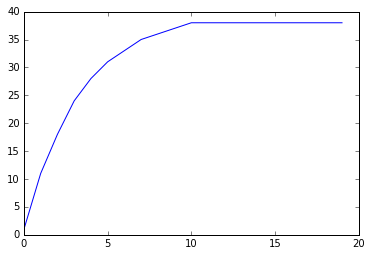

In [15]:
import matplotlib.pyplot as plt
## next line is 'magic' to make the plot appear in the notebook
%matplotlib inline
plt.plot(tvec,N);  ## semicolon suppresses ugly output

There's a bunch of stuff you can do with the plot; change colours (`c=`), add points (`marker=`), set the axes limits, title, label, etc. ...

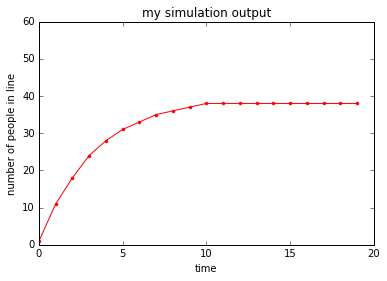

In [16]:
plt.plot(tvec,N, c="red",marker=".")
plt.ylim(0,60)
plt.title('my simulation output')
plt.xlabel('time')
plt.ylabel('number of people in line');

You can plot more than one line on a graph by using more than one `plt.plot()` call; if you want to add a legend, you need to plan ahead a bit by adding labels to each line as you plot it. Suppose you want to plot the solution to the model along with the closed-form solution we computed above:

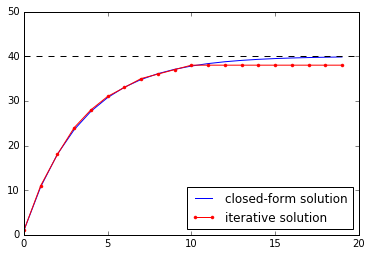

In [26]:
plt.plot(tvec,Nsol,c="blue",label="closed-form solution")
plt.ylim(0,50)
plt.plot(tvec,N, c="red",marker=".",label="iterative solution")
plt.legend(loc="lower right")
plt.axhline(y=a/(1-b),linestyle="dashed",c="black"); ## add a horizontal line


(Why do these not converge to the same answer?)

# Jupyter notebook tricks

As you have seen, Jupyter notebooks intersperse Python code (*code chunks*) with text chunks, called *markdown chunks* ("markdown" is a text format).

-----
**ex**: add a new markdown chunk below this one by clicking on this cell to select it and using `Insert/Insert Cell Below` (or typing `b`). Then click the menu item above that says "Code" ...

![test](jupyter_menu.png)

and change it to "Markdown" (or, click to the left of the edit box and type `m`). Type some text in the box, then type SHIFT-ENTER: the format will change from an editing format to a display format.

Now clean up. (`Edit/Delete Cells` or select the chunk and type `dd`.)

----


You can easily do simple formatting in markdown, including *italic text* and **bold text**. Double-click on this chunk to see how it's done. Type SHIFT-ENTER when you're done to go back to display format.

More importantly, Jupyter notebooks let you enter text in [LaTeX format](https://en.wikipedia.org/wiki/LaTeX), the format that 99.99% of mathematicians (and 50% of natural scientists) use to typeset mathematics.

- Dollar signs before and after some text specify that it's LaTeX format
- Greek letters use a backslash \ plus the letter name (use capital letters first for uppercase): $\alpha$, $\beta$, $\Xi$
- a caret (^) means uppercase and an underscore _ means subscript: $a^2$, $b_x$
- curly braces {} are used for grouping: $a^{327}$
- `\frac{}{}` means a fraction: $\frac{dN}{dt} = rN^{\theta}$

Click on this text box to see exactly how the expressions are written out.

# exercise

Figures 1.5 to 1.7 in the book illustrate an example based on sandhill cranes. In the simplest version of this model, the crane population changes according to $C(t+1)=(1+r)C(t)$. A variant of the model adds [hacking](http://www.ccbbirds.org/what-we-do/research/species-of-concern/peregrine-falcon/virginia-hacking/), i.e. an addition of a constant number of birds per year to the population. (As in the example above, the birds are assumed to be added *after* the proportional gain or loss, i.e $C(t+1)=(1+r) C(t) +h$. Create a *single* plot for each of the following cases; in each case include a legend and axis labels. 

1. Show the number of birds over time, in the absence of hacking, starting from 100 birds in year 0, for 15 years (i.e. up to year 14), with (a) $r$=0.0194; (b) $r$=-0.0324; (c) $r$=-0.0382. (Remember, show all three trajectories on the same plot.)
2. Now assuming 5 chicks added per year, draw trajectories for the medium- and worst-case scenarios from #1 (i.e., b and c), with the same starting condition, for 100 years. 
3. Still assuming 5 chicks added per year, in the medium case ($r$=-0.0324), show the dynamics over 210 years, using three different starting conditions (35, 100, and 200 birds in year 0).